### Import main packages

In [4]:
import numpy as np
import figurefirst as fifi
import matplotlib as mpl
from mpmath import *
import matplotlib.font_manager

### Initialize plotting parameters

In [15]:
# Plotting parameters
basefs=9
mpl.rcParams["mathtext.fontset"]    = "cm"
mpl.rcParams['font.family']         = 'Arial'
mpl.rcParams["font.size"]           = basefs
mpl.rcParams["axes.labelsize"]      = basefs+2
mpl.rcParams["xtick.labelsize"]     = basefs
mpl.rcParams["ytick.labelsize"]     = basefs
mpl.rcParams["legend.fontsize"]     = basefs
mpl.rcParams["legend.edgecolor"]    = "black" ;
mpl.rcParams["legend.fancybox"]     = True
mpl.rcParams["legend.borderpad"]    = 0.5
mpl.rcParams["legend.handlelength"] = .75
mpl.rcParams["lines.linewidth"]     = 1
mpl.rcParams["lines.markersize"]    = 3
mpl.rcParams["text.usetex"]         = False
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amsmath,amsthm}; \\usepackage{physics}";

[array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])]
0.138893687075
0.0015929221030713545
{'ismplfigure': False}


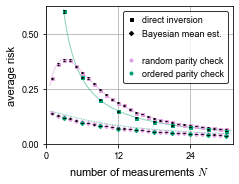

In [16]:
filename = "BDS_dirinv_layout" 

layout = fifi.svg_to_axes.FigureLayout(
                                       filename + ".svg",
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[]
                                      )

ax = layout.axes[("fig", "ax")]

title = ['BDS_dirichlet']
name = "unordered.npy"
meas = ['Bayesian Mean Estimation','Direct Inversion']
c_meas = ['#009E73', '#0072B2', '#D55E00', '#56B4E9', '#E69F00']
c_meas = ['#009E73', 'plum', '#0072B2', '#56B4E9', '#E69F00']

markers = ['D', 's']

n_meas = [np.arange(3, 31, 3, dtype= int), np.arange(1, 31, 1, dtype= int)]
print(n_meas[::2])
n_sample = 4000

HS = np.load(name)[[1, 5], 0, 0, :, :, :] #[estimator][nmeas][sample]
HS = HS[:, [1, 2]] #[estimator][nmeas][sample]
HS = HS[:, :, :, :n_sample] #[estimator][nmeas][sample]

th_sq = 2 / 5
def fun(N):
    return (2/3)**N * ((1 - th_sq)*(1/2 * N * hyp3f2(1, 1, 1 - N, 2, 2, -1/2) - 1) + 3/4)

axs = layout.axes[("fig", "ax")]

for i in [0, 1]:
    for j in [0, 1]:
        temp = HS[j][i][:len(n_meas[i])]
        HS_std = np.std(1 - temp, axis=1) / np.sqrt(n_sample)
        if j == 0 and i == 1: 
            print(np.average(temp, axis=1)[0])
            print(HS_std[0])
        axs.errorbar(n_meas[i], np.average(temp, axis=1), yerr= HS_std, c= c_meas[i], lw=0, ls= "", marker= markers[j], alpha=1, zorder= 9-3*i)
        axs.errorbar(n_meas[i], np.average(temp, axis=1), yerr= HS_std, c= 'black', lw= 0.5, ls= "",  ms= 0, alpha=1, capsize= 1, zorder= 10-3*i)

axs.errorbar(10, 10, yerr= 0.02, c= 'black', lw=0, ls= "", marker= 's', alpha=1, label= "direct inversion")
axs.errorbar(10, 10, yerr= 0.02, c= 'black', lw=0, ls= "", marker= 'D', alpha=1, label= "Bayesian mean est.")
axs.errorbar(10, 10, yerr= 0.02, c= 'white', lw=0, ls= "", marker= 'D', alpha=1, label= " ")
axs.errorbar(10, 10, yerr= 0.02, c= c_meas[1], lw=0, ls= "", marker= 'o', alpha=1, label= "random parity check")
axs.errorbar(10, 10, yerr= 0.02, c= c_meas[0], lw=0, ls= "", marker= 'o', alpha=1, label= "ordered parity check")

x = np.linspace(0.7, 30.7, 1000)
y= [fun(N) for N in x]
axs.plot(x, y, c= c_meas[1],  ls= '-', alpha= 0.6, zorder= 1)
axs.plot(x, y, c= 'white',  ls= '-', alpha= 0.1, zorder= 2)
x = np.linspace(2.95, 30.7, 1000)
axs.plot(x, 9/(5*x), c= c_meas[0], ls= '-', alpha =0.5, zorder= 1)
axs.plot(x, 9/(5*x), c= 'white', ls= '-', alpha =0.1, zorder= 2)

x = np.linspace(0.7, 30.7, 1000)
axs.plot(x, (x+3)/(5*(x/3+2)**2), c= c_meas[0], ls= ':', dash_capstyle= 'round', alpha =0.5, zorder= 1)
axs.plot(x, (x+3)/(5*(x/3+2)**2), c= 'white', ls= ':', dash_capstyle= 'round', alpha =0.1, zorder= 2)


axs.set_xlim(0, 31)
axs.set_ylim(0, 0.625)
axs.set_xticks(np.arange(0, 31, 12, dtype= int))
axs.set_yticks([0, 0.25, 0.5])
axs.legend(loc='upper right')
axs.grid()
axs.set_axisbelow(True)
axs.set_xlabel(r'number of measurements $N$')
axs.set_ylabel(r'average risk')
    
tmp = layout.save("BDS_mean_dirinv.svg")